# KQL - Kusto Query Language

## Introduction to Kusto Query Language (KQL)

Kusto Query Language (KQL) is a powerful query language developed by Microsoft, designed for querying large datasets in Azure Data Explorer and other Azure services like Log Analytics and Application Insights. It is optimized for fast data exploration and analysis, making it an essential tool for observability in modern cloud environments.

### Why KQL for Observability?

In observability, we deal with massive amounts of telemetry data, such as logs, metrics, and traces. KQL provides a simple yet expressive syntax to query, filter, and analyze this data efficiently.
### Key Features of KQL

- **Ease of Use**: Intuitive syntax that is easy to learn and use.
- **High Performance**: Optimized for querying large-scale datasets with low latency.
- **Rich Functionality**: Supports filtering, aggregation, joins, and advanced analytics.
- **Integration**: Works seamlessly with Azure Monitor, Log Analytics, and Application Insights.

In this workshop, we will explore the fundamentals of KQL and demonstrate how it can be used to enhance observability in your systems. By the end of the session, you will be equipped with the skills to write effective KQL queries and you should be able to gain actionable insights from your telemetry data.

### Common KQL Queries and Statements for Observability

Below are some of the most commonly used KQL queries and statements for observability, focusing on logs, metrics, and telemetry data analysis.

#### 1. **Retrieve Data from a Table**
```kql
AppTraces
| take 10
```
This retrieves the first 10 rows from the `AppTraces`.

---

#### 2. **Filter Data**
```kql
AppTraces |
where SeverityLevel == 2 // Error
```
Filters the logs to show only rows where the `SeverityLevel` column has the value "2".

---

#### 3. **Project Specific Columns**
```kql
AppTraces
| project TimeGenerated, Message, SeverityLevel
```
Selects only the `TimeGenerated`, `Message`, and `SeverityLevel` columns from the table.

---

#### 4. **Sort Data**
```kql
AppTraces
| order by TimeGenerated desc
```
Sorts the logs by the `TimeGenerated` column in descending order.

---

#### 5. **Aggregate Data**
```kql
AppTraces
| summarize Count = count() by SeverityLevel
```
Counts the number of logs grouped by the `SeverityLevel` column.

---

#### 6. **Calculate Trends Over Time**
```kql
AppTraces
| summarize Count = count() by bin(TimeGenerated, 1h)
```
Groups logs into 1-hour intervals and counts the number of logs in each interval.

---

#### 7. **Join Tables**
```kql
TableA
| join kind=inner (TableB) on CommonColumn
```
Performs an inner join between `TableA` and `TableB` on the `CommonColumn`.

---

#### 8. **Detect Anomalies**
```kql
AppTraces
| summarize Count = count() by bin(TimeGenerated, 1h)
| extend Anomaly = iff(Count > 30, "Yes", "No")
```
Detects anomalies by flagging intervals where the count exceeds a predefined threshold, This could be used to configure alerts. eg if out failure rate is 5% and we see 10% in the last hour, we can set an alert to notify us of this anomaly.

---

#### 9. **Parse JSON Data**
```kql
LogsTable
| extend ParsedField = parse_json(JsonColumn).FieldName
```
Extracts a specific field (`FieldName`) from a JSON column.

---

#### 10. **Render Visualizations**
```kql
AppTraces
| summarize Count = count() by bin(TimeGenerated, 1h)
| render timechart
```
Creates a time chart visualization of log counts over time.


These queries can be adapted to your specific use case by replacing table names, column names, and parameters as needed. They provide a solid foundation for analyzing telemetry data and gaining insights into system behavior.

#### Azure Monitor Workbooks
Let's try to put this into practices.

For this you should go to the Azure portal and open the Azure 'Monitor' Service. Under the left blade menu there is a workbooks section. 

Workbooks, are the build in way to visualize data in Azure Monitor. You can create your own workbooks, or use the ones that are already available.

Let's start by taking a quick look at the existing workbooks, 

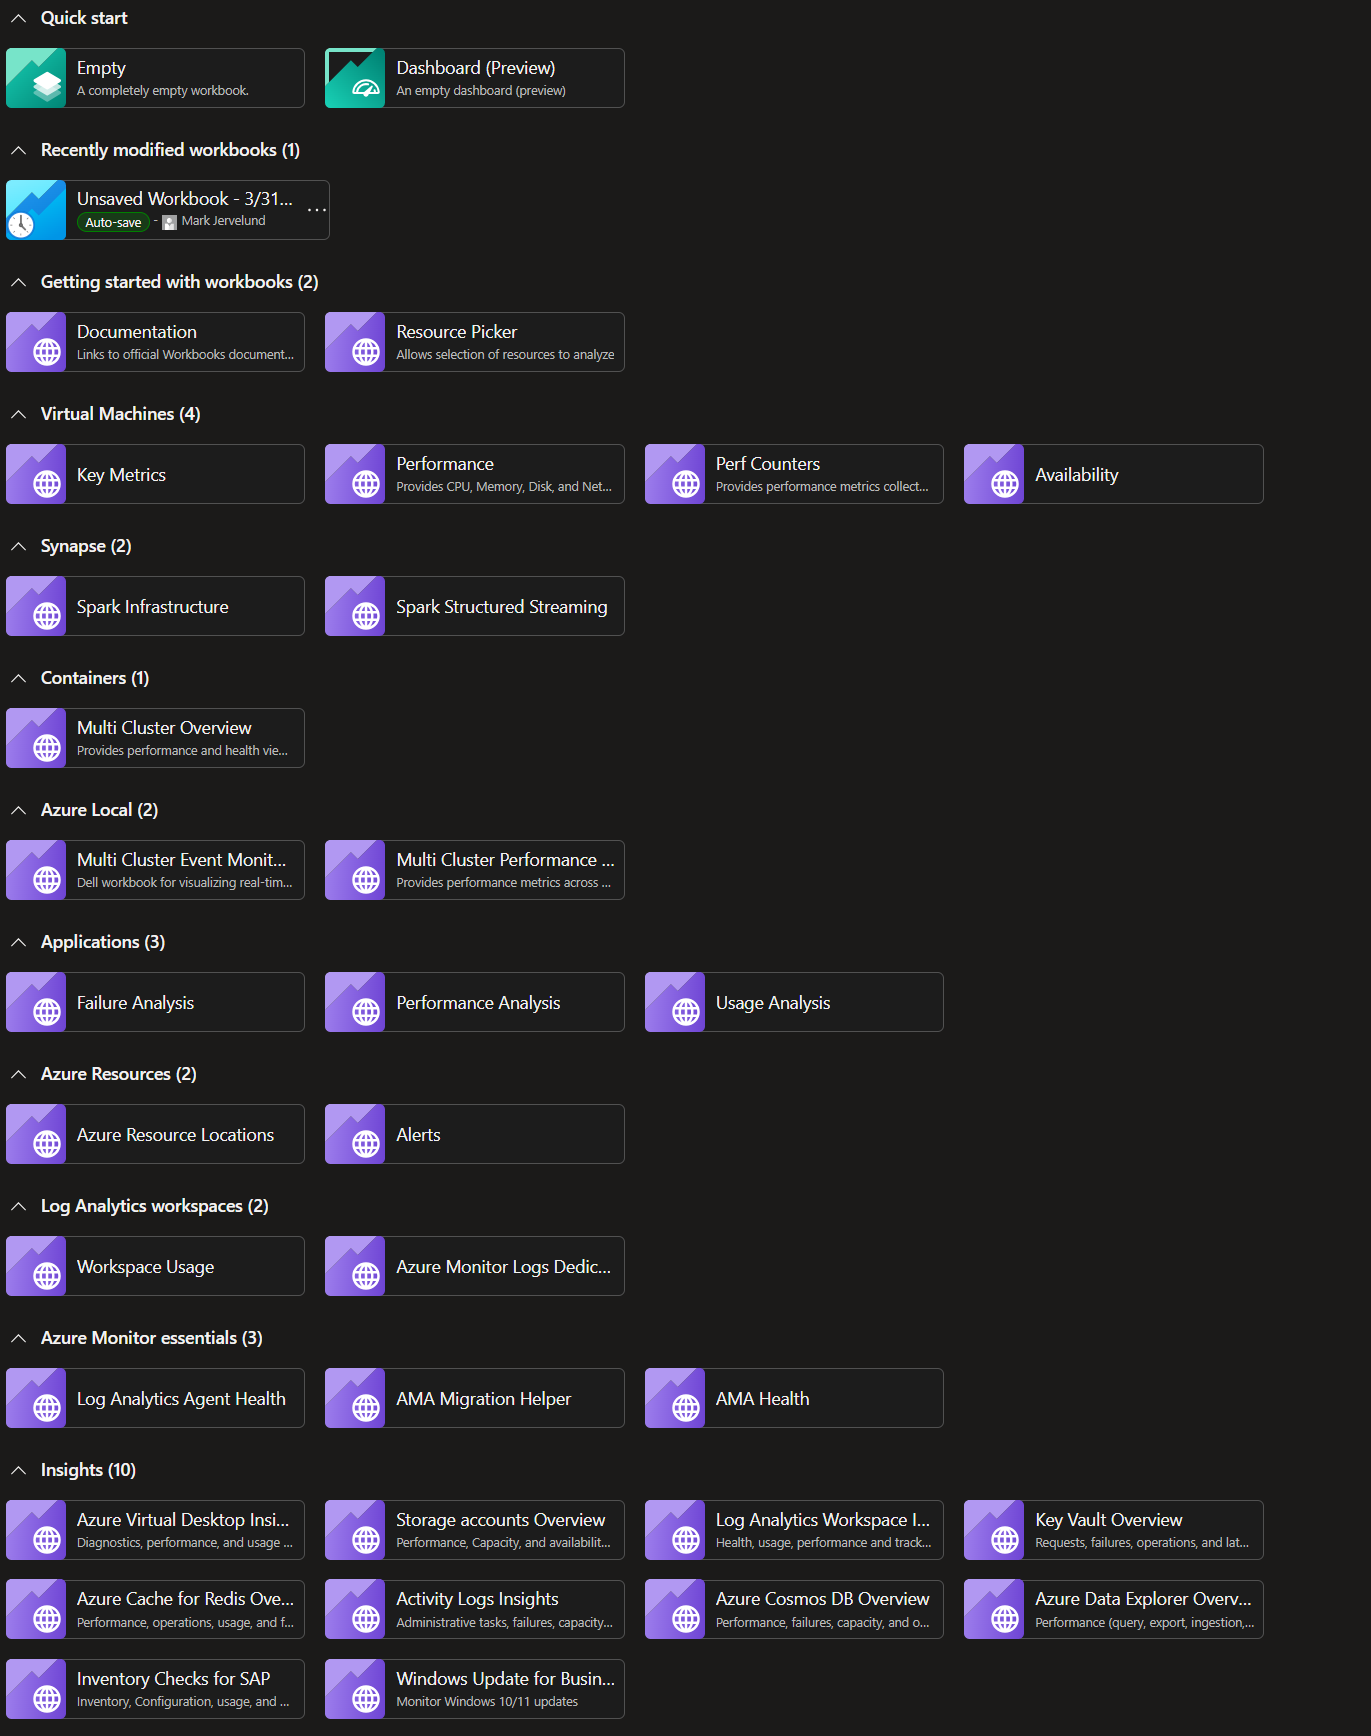

Let's try to create a new workbook. Click on the 'New' button, and select 'Logs' from the list of available templates.

Try implementing the following queries in the workbook.

* How many logs, traces and exceptions do we have in the last 24 hours?
* what is the average duration of the our different dependency calls, and what are the percentile(99th, 95, 90)?
* How many users are using the application?
* How many users are using the application in the last 24 hours?, or per day for the last 7 days?
* What the 5 most common exceptions in the last 24 hours?, and how many occurrences of each exception do we have?


Let's take a look at alerts.

To create an alert, you need to go to the 'Alerts' section in the Azure Monitor service. Click on the 'New Alert Rule' button.

You will be prompted to select a scope. The scope is the resource that you want to monitor. In this case, we will select the resource group that contains the application insights resource.

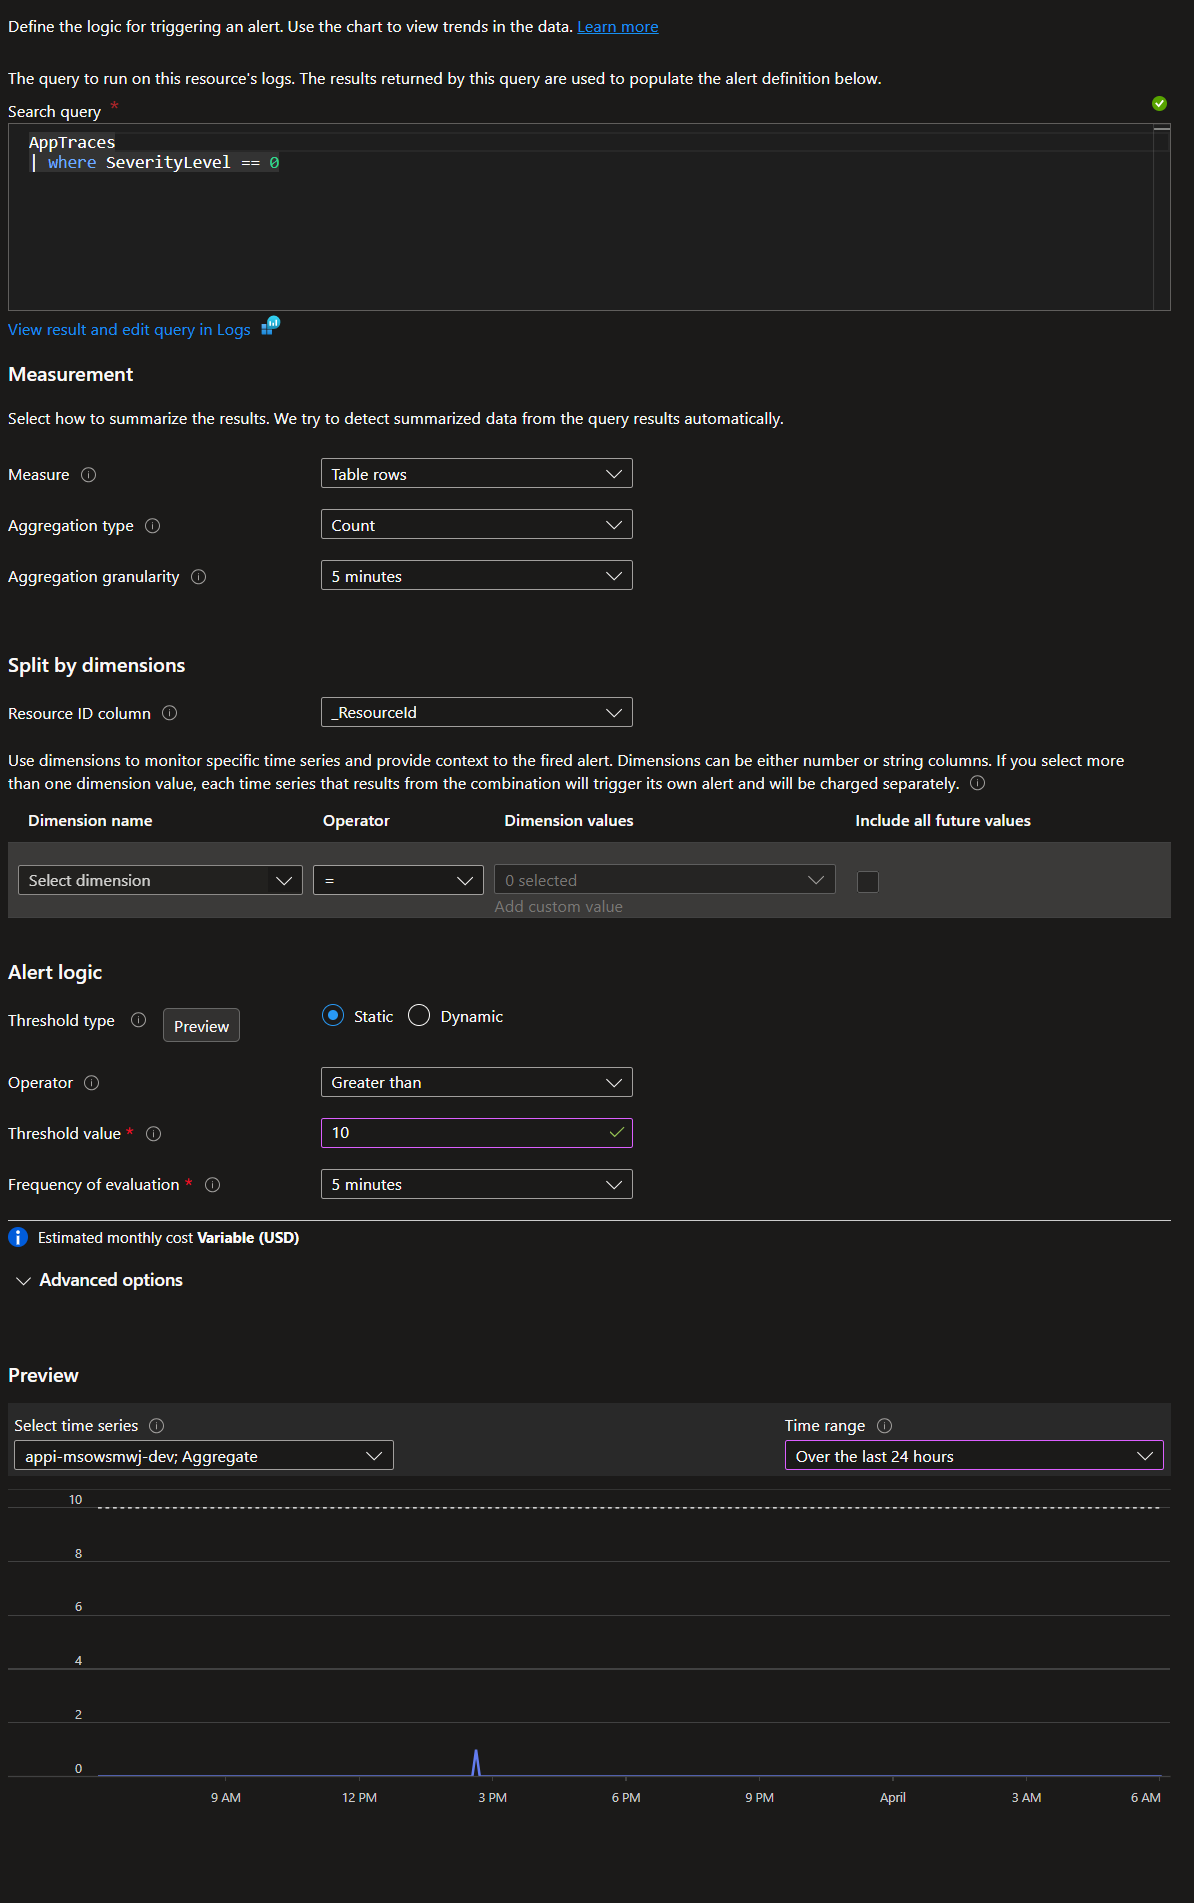

For now we can just enter a simple query, eg how many apptraces do we have in the last 24 hours with a severity level of 0. You can also use any other metrics here, is our response time going up, or are hitting the rate limit of our openai service. or is one of our services acting differently than expected via the dynamic threshold.


### More in depth about Kusto.

If you play more with kusto take a look at https://detective.kusto.io/ or explorer to documentation at https://learn.microsoft.com/en-us/kusto/query/

#### Done for today

Thanks for joining, and have a great day. If you have any questions, please feel free to reach out.